2.4800717482353616e-05

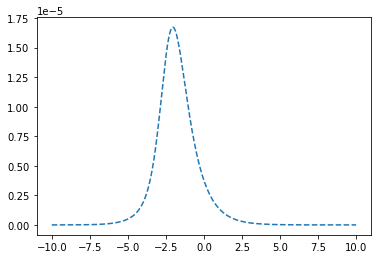

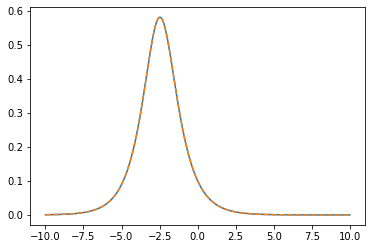

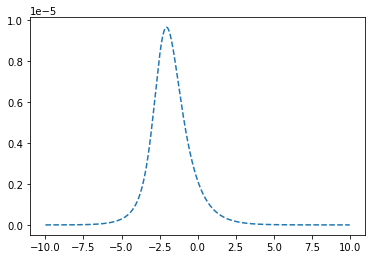

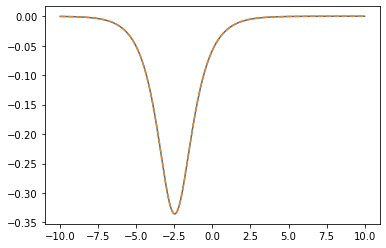

In [2]:
import numpy as np
import matplotlib.pyplot as mtp

J0 = -1                                    #параметр фокус/дефокус. Фокус при -1
t_span = 20                                     #длина промежутка
M = 11; N = 2**M;                          #N - кол-во точек

dx = 2 * t_span / N;                                #шаг ядра

x_pot = np.linspace(-t_span / 2, t_span / 2 - dx / 2, N)       #сетка потенциала
x_kernel = 2*x_pot                         #сетка ядра

phi = np.pi/6                                  #угол поляризации
theta1 = np.pi/4; theta2 = np.pi/4+np.pi;      #фазы одной и другой поляризации солитона
w = -0.2 / t_span; beta = 10 / t_span;                       #параметр "частоты" и параметр амплитуды
delta = t_span * beta / 4                               #сдвиг солитона

q1_0 = 2*beta*np.cos(phi)*np.exp(-2j*w*x_pot+1j*theta1)/np.cosh(2*beta*x_pot + delta)    #поляризация солитона 1
q2_0 = 2*beta*np.sin(phi)*np.exp(-2j*w*x_pot+1j*theta2)/np.cosh(2*beta*x_pot + delta)    #поляризация солитона 2

#mtp.figure()
#mtp.plot(x_pot,np.real(q1),x_pot,np.imag(q1))
#mtp.figure()
#mtp.plot(x_pot,np.real(q2),x_pot,np.imag(q2))

k = 1j*beta+w;
m1 = 2*beta*np.cos(phi)*np.exp(delta+1j*theta1);        #конструирование коэф номрировки 1
m2 = 2*beta*np.sin(phi)*np.exp(delta+1j*theta2);        #конструирование коэф номрировки 2

R1 = -m1*np.exp(-1j*k*x_kernel)                         #ядро 1
R2 = -m2*np.exp(-1j*k*x_kernel)                         #ядро 2

q1 = np.zeros(N)*1j; q2 = np.zeros(N)*1j;               #создание массивов для значений восстановленного потенциала

q1[0] = -2*R1[0]; q2[0] = -2*R2[0];                     #первый шаг алгоритма

R1[0] = R1[0]/2;  R2[0] = R2[0]/2;
y = (1 - J0*R1[0]*np.conj(R1[0])*dx*dx - J0*R2[0]*np.conj(R2[0])*dx*dx)**(-1);
y = np.array(y)
z1= -dx*R1[0]*y; z2 = -dx*R2[0]*y;                      #создание элементов обратной матрицы

bet1 = R1[1]*y; bet2 = R2[1]*y;                         #бета алгоритма для m=1
q1[1] = -2*bet1; q2[1] = -2*bet2;

for m in range(2,N):
    c_m = (1 - J0*bet1*np.conj(bet1)*dx*dx - J0*bet2*np.conj(bet2)*dx*dx)**(-1)
    d_m1 = -dx*bet1*c_m; d_m2 = -dx*bet2*c_m;
    y0 = np.append(y,[0]); z10 = np.append(z1,[0]); z20 = np.append(z2,[0]);

    y = c_m*y0 + J0*d_m1*np.flip(np.conj(z10)) + J0*d_m2*np.flip(np.conj(z20));
    z1= c_m*z10 + d_m1*np.flip(np.conj(y0));
    z2= c_m*z20 + d_m2*np.flip(np.conj(y0));

    bet1 = np.sum(R1[m:0:-1]*y)
    bet2 = np.sum(R2[m:0:-1]*y)

    q1[m]= -2*bet1; q2[m]= -2*bet2;

fig1 = mtp.figure();
# mtp.plot(x_pot,np.real(q1),x_pot,np.real(q1_0),'--')
mtp.plot(x_pot,np.absolute(q1 - q1_0),'--')

fig2 = mtp.figure();
mtp.plot(x_pot,np.imag(q1),x_pot,np.imag(q1_0),'--')

fig3 = mtp.figure();
# mtp.plot(x_pot,np.real(q2),x_pot,np.real(q2_0),'--')
mtp.plot(x_pot,np.absolute(q2 - q2_0),'--')

fig4 = mtp.figure();
mtp.plot(x_pot,np.imag(q2),x_pot,np.imag(q2_0),'--')

sigma = np.sqrt(np.sum(0.5*dx*(abs(q1-q1_0)**2+abs(q2-q2_0)**2)))
sigma

In [3]:
from vector_tib import vdtib
import matplotlib.pyplot as plt
import numpy as np

sigma = -1  # focus / defocus = -1 / +1
t_span = 2 ** 5
nt_span = 2 ** 10



dt = t_span / nt_span
t = np.linspace(-t_span / 2, t_span / 2 - dt, nt_span)
t_kernel = 2 * t                         #сетка ядра

phi = np.pi/6                                  #угол поляризации
theta1 = np.pi/4
theta2 = np.pi/4 + np.pi      #фазы одной и другой поляризации солитона
w = -0.2 / t_span
beta = 10 / t_span                      #параметр "частоты" и параметр амплитуды
delta = t_span * beta / 4                               #сдвиг солитона

q1_0 = 2 * beta * np.cos(phi) * np.exp(-2j * w * t + 1j * theta1) / \
       np.cosh(2 * beta * t + delta)    #поляризация солитона 1
q2_0 = 2 * beta * np.sin(phi) * np.exp(-2j * w * t + 1j * theta2) / \
       np.cosh(2 * beta * t + delta)    #поляризация солитона 2

#mtp.figure()
#mtp.plot(x_pot,np.real(q1),x_pot,np.imag(q1))
#mtp.figure()
#mtp.plot(x_pot,np.real(q2),x_pot,np.imag(q2))

k = 1j * beta + w
m1 = 2 * beta * np.cos(phi) * np.exp(delta + 1j * theta1)    #конструирование коэф номрировки 1
m2 = 2 * beta * np.sin(phi) * np.exp(delta + 1j * theta2)       #конструирование коэф номрировки 2

R1 = -m1 * np.exp(-1j * k * t_kernel)                         #ядро 1
R2 = -m2 * np.exp(-1j * k * t_kernel)                         #ядро 2

In [6]:
print(len(R1))

1024


In [4]:
q1, q2 = vdtib(R1, R2, t_kernel)

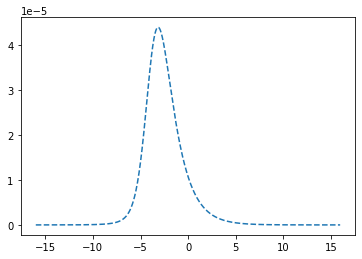

In [5]:
fig1 = plt.figure()
plt.plot(t, np.absolute(q1 - q1_0), '--')

In [26]:
from FNFTpy import manakovv
from nft_analyse import get_omega_continuous, get_omega_discrete

xi_span = np.pi / dt
n_xi = nt_span
d_xi = xi_span / (n_xi - 1)
xi = np.linspace(-xi_span / 2, xi_span / 2 - d_xi, n_xi)
# xi = np.array([i * d_xi - xi_span / 2. for i in range(n_xi)])

res = manakovv(q1_0 * 10, q2_0 * 2, t, Xi1=xi[0], Xi2=xi[-1], M=n_xi, dis=0, cst=2, dst=2)

z_back = 0

xi_d = res['bound_states']
rd = res['disc_res']
bd = res['disc_norm']
ad = bd / rd

a = res['cont_a']
b1 = res['cont_b1']
b2 = res['cont_b2']
r1 = res['cont_ref1']
r2 = res['cont_ref2']

# b1_prop = b1 * np.exp(-2. * 1.0j * z_back * np.power(xi, 2))
# b2_prop = b2 * np.exp(-2. * 1.0j * z_back * np.power(xi, 2))
# bd_prop = bd * np.exp(-2. * 1.0j * z_back * np.power(xi_d, 2))
#
# coef_t = 2.0
# omega_r1 = get_omega_continuous(b1_prop / a, xi, coef_t * t)
# omega_r2 = get_omega_continuous(b2_prop / a, xi, coef_t * t)
# omega_d = get_omega_discrete(bd_prop / ad, xi_d, coef_t * t)
#
# q1_tib, q2_tib = vdtib(omega_d + omega_r1, omega_d + omega_r2, coef_t * t)

/tmp/ipykernel_19729/2381478431.py:17: RuntimeWarning: invalid value encountered in true_divide
  ad = bd / rd


In [28]:
print(xi_d)
print(rd)

[ 6.68180460e+01+0.13829235j  6.68187932e+01+0.76624221j
  6.68192425e+01+1.40065833j  6.68191066e+01+2.04184163j
  6.68180684e+01+2.68994388j  1.00229921e+02+0.15151567j
  1.00229919e+02+0.77496306j  1.00229919e+02+1.39832417j
  1.00229918e+02+2.02174967j  1.00229918e+02+2.64517623j
  1.00229919e+02+3.26851648j  1.00229922e+02+3.89165803j
  1.00229925e+02+4.51446274j  1.00229931e+02+5.13676504j
  6.68157833e+01+3.34509339j -6.68305061e+01+0.13616899j
 -6.68312521e+01+0.76410781j -6.68317013e+01+1.39851687j
 -6.68315669e+01+2.03970227j -6.68305321e+01+2.68781622j
 -6.68282526e+01+3.34298745j  3.34056466e+01+0.13616899j
  3.34049006e+01+0.76410781j  3.34079001e+01+3.34298745j
  3.34044514e+01+1.39851687j  3.34056206e+01+2.68781622j
  3.34045858e+01+2.03970227j -3.34203694e+01+3.34509339j
 -3.34181067e+01+0.13829235j -3.34180843e+01+2.68994388j
 -3.34173595e+01+0.76624221j -3.34170461e+01+2.04184163j
 -3.34169102e+01+1.40065833j -6.22191685e-03+5.13676505j
 -6.22728647e-03+4.51446272j -6

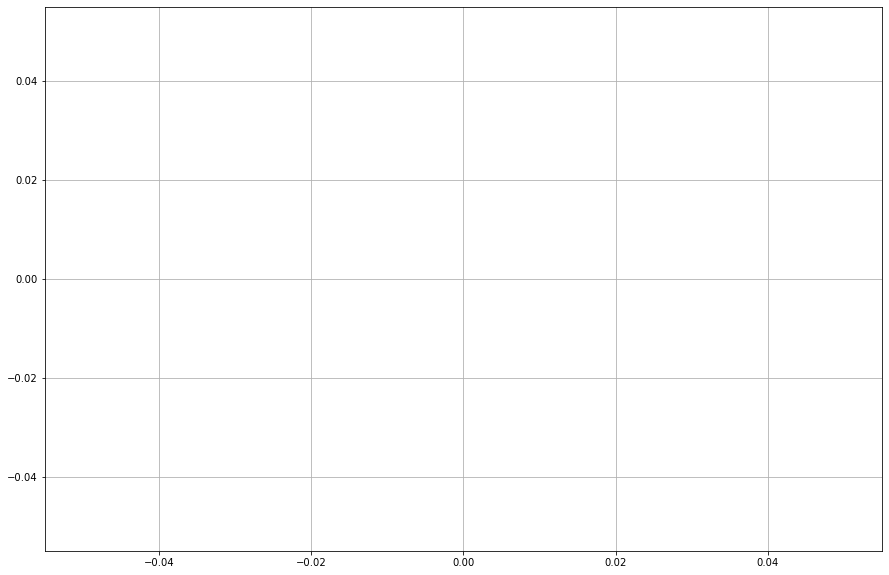

In [23]:
fig = plt.figure(figsize=(15, 10))
# plt.plot(xi, np.absolute(res['cont_ref1']), '--', color='green')
# plt.plot(xi, np.absolute(res['cont_ref2']), '--', color='red')
plt.plot(xi, np.absolute(q1_tib - q1_0), '--', color='green')
plt.plot(xi, np.absolute(q2_tib - q2_0), '--', color='red')
plt.grid()

In [18]:
print(res['bound_states_num'])
print(res['bound_states'])

6
[-6.23048198e-03+0.31338632j -3.34208597e+01+0.10190089j
  3.34083963e+01+0.10166103j -6.68277564e+01+0.10166103j
  6.68152930e+01+0.10190089j  1.00229922e+02+0.31338632j]


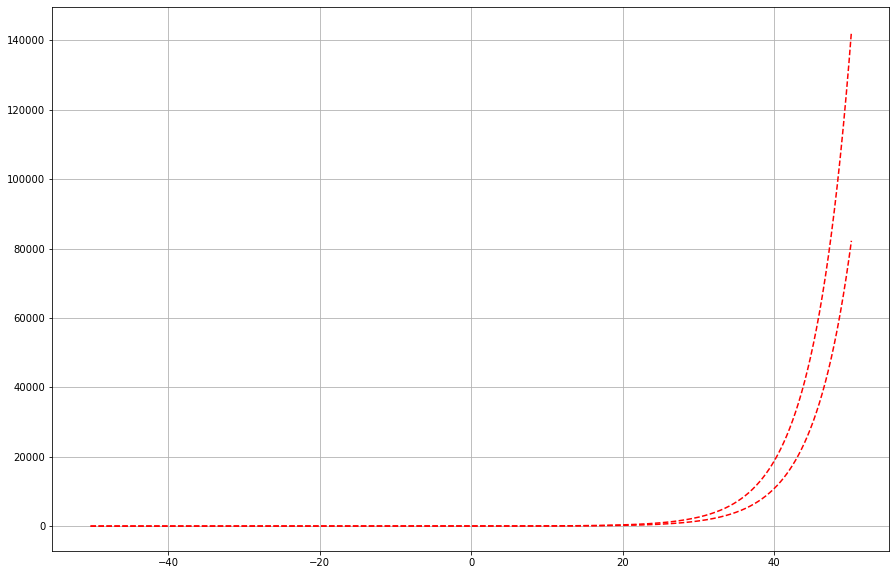

In [17]:
fig = plt.figure(figsize=(15, 10))
# plt.plot(xi, np.absolute(res['cont_ref1']), '--', color='green')
# plt.plot(xi, np.absolute(res['cont_ref2']), '--', color='red')
plt.plot(xi, np.absolute(R1), '--', color='red')
plt.plot(xi, np.absolute(R2), '--', color='red')
plt.grid()